<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-definition" data-toc-modified-id="Problem-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem definition</a></span></li><li><span><a href="#Prepare-data-set" data-toc-modified-id="Prepare-data-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare data set</a></span><ul class="toc-item"><li><span><a href="#Load-and-clean-dataset" data-toc-modified-id="Load-and-clean-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load and clean dataset</a></span><ul class="toc-item"><li><span><a href="#Prepare-a-label" data-toc-modified-id="Prepare-a-label-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Prepare a label</a></span></li><li><span><a href="#Create-training/validation/test-dataframes" data-toc-modified-id="Create-training/validation/test-dataframes-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Create training/validation/test dataframes</a></span></li><li><span><a href="#Balance-training-data-set" data-toc-modified-id="Balance-training-data-set-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Balance training data set</a></span></li></ul></li></ul></li><li><span><a href="#Preprocess-text-data" data-toc-modified-id="Preprocess-text-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocess text data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preprocess-all-the-notes" data-toc-modified-id="Preprocess-all-the-notes-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Preprocess all the notes</a></span></li><li><span><a href="#Build-a-tokenizer" data-toc-modified-id="Build-a-tokenizer-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Build a tokenizer</a></span></li></ul></li><li><span><a href="#Build-a-vectorizer-on-the-clinical-notes" data-toc-modified-id="Build-a-vectorizer-on-the-clinical-notes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Build a vectorizer on the clinical notes</a></span></li></ul></li><li><span><a href="#Frequency-of-words" data-toc-modified-id="Frequency-of-words-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Frequency of words</a></span></li><li><span><a href="#Build-a-simple-predictive-model" data-toc-modified-id="Build-a-simple-predictive-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build a simple predictive model</a></span></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Performance Metrics</a></span></li><li><span><a href="#Try-to-improve-the-model" data-toc-modified-id="Try-to-improve-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Try to improve the model</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Importance</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#update-stop-words" data-toc-modified-id="update-stop-words-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>update stop words</a></span></li></ul></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#number-of-estimators" data-toc-modified-id="number-of-estimators-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>number of estimators</a></span></li><li><span><a href="#max-depth" data-toc-modified-id="max-depth-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>max depth</a></span></li><li><span><a href="#min_samples_split" data-toc-modified-id="min_samples_split-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>min_samples_split</a></span></li><li><span><a href="#max_features" data-toc-modified-id="max_features-8.1.4"><span class="toc-item-num">8.1.4&nbsp;&nbsp;</span>max_features</a></span></li></ul></li></ul></li><li><span><a href="#Final-model" data-toc-modified-id="Final-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Final model</a></span></li></ul></div>

# Problem definition

Predict which patients are at risk for 30-day unplanned readmission  with the help of  hospital discharge summaries.
One of the reference  paper (https://arxiv.org/abs/1801.07860)  has the metric AUC around 0.75–76. Let us see whether we can reproduce that. 


# Prepare data set

## Load and clean dataset 

We will utilize the MIMIC-III data set.

In this project, we will make use of the following MIMIC tables
- ADMISSIONS - a table containing admission and discharge dates (has a unique identifier HADM_ID for each admission)
- NOTEEVENTS - contains all notes for each hospitalization (links with HADM_ID)

This  project uses ADMISSIONS.csv and NOTEEVENTS.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mimic_utils

In [2]:
%%time

df = mimic_utils.load_clean_merge_dataset('ADMISSIONS.csv','NOTEEVENTS.csv')

/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/IPython/core/magics/execution.py:1310: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 1min 25s, sys: 8.25 s, total: 1min 34s
Wall time: 4min 49s


In [3]:
df.head(3).T

,1,2,4
SUBJECT_ID,3,4,6
HADM_ID,145834,185777,107064
ADMITTIME,2101-10-20 19:08:00,2191-03-16 00:28:00,2175-05-30 07:15:00
DISCHTIME,2101-10-31 13:58:00,2191-03-23 18:41:00,2175-06-15 16:00:00
DAYS_NEXT_ADMIT,NaN,NaN,NaN
NEXT_ADMITTIME,NaT,NaT,NaT
ADMISSION_TYPE,EMERGENCY,EMERGENCY,ELECTIVE
DEATHTIME,NaT,NaT,NaT
TEXT,Admission Date: [**2101-10-20**] Discharg...,Admission Date: [**2191-3-16**] Discharge...,Admission Date: [**2175-5-30**] Dischar...


### Prepare a label 

create a specific column in the dataframe as OUTPUT_LABEL if the patient was re-admitted within 30 days

In [4]:
df['OUTPUT_LABEL'] = (df.DAYS_NEXT_ADMIT < 30).astype('int')

In [5]:
print('Number of positive samples:', (df.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df))

Number of positive samples: 3004
Number of negative samples: 48109
Total samples: 51113


### Create training/validation/test dataframes

In [6]:
# shuffle the samples
df = df.sample(n = len(df), random_state = 42)
df = df.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df.drop(df_valid_test.index)

In [7]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all)))
print('all samples (n = %d)'%len(df))

Test prevalence(n = 7667):0.062
Valid prevalence(n = 7667):0.057
Train all prevalence(n = 35779):0.058
all samples (n = 51113)


In [8]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

### Balance training data set

In [9]:
df_test = pd.read_csv('df_test.csv') 
df_valid = pd.read_csv('df_valid.csv')
df_train_all= pd.read_csv('df_train_all.csv')

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))

Test prevalence(n = 7667): 0.061953828094430674
Valid prevalence(n = 7667): 0.056997521846876224
Train all prevalence(n = 35779): 0.05847005226529529


Since the prevalence is so low, we want to prevent the model from always predicting negative we will sub-sample the negatives

In [10]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos),len(df_train_neg)])

# merge the balanced data
df_train = pd.concat([df_train_pos.sample(n = n, random_state = 42), \
                      df_train_neg.sample(n = n, random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

Train prevalence (n = 4184): 0.5


In [11]:
# save csv 
df_train.to_csv('df_train.csv',index=False)

In [12]:
df_train = pd.read_csv('df_train.csv')

# Preprocess text data

Preprocess our text data to convert it be useful for  Bag-of-Words (BOW) approach.

### Preprocess all the notes

Modify the original dataframe by dealing with the missing text, newlines and carriage returns

In [13]:
def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

In [14]:
# preprocess the text to deal with known issues
df_train = preprocess_text(df_train)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)

### Build a tokenizer

In [15]:
import nltk
from nltk import word_tokenize
import string


In [16]:
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

## Build a vectorizer on the clinical notes

In [17]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)

# this could take a while
vect.fit(df_train.TEXT.values)

CPU times: user 28.8 s, sys: 30.1 ms, total: 28.8 s
Wall time: 29 s


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_better at 0x7fc091ca0e18>,
                vocabulary=None)

# Frequency of words

In [18]:
neg_doc_matrix = vect.transform(df_train[df_train.OUTPUT_LABEL == 0].TEXT)
pos_doc_matrix = vect.transform(df_train[df_train.OUTPUT_LABEL == 1].TEXT)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
the,71054,76756,147810
and,62455,71658,134113
to,53226,62085,115311
of,51303,60491,111794
was,48074,53521,101595
with,38036,44583,82619
a,35428,41629,77057
on,32290,39765,72055
mg,27718,39045,66763
in,29567,34755,64322


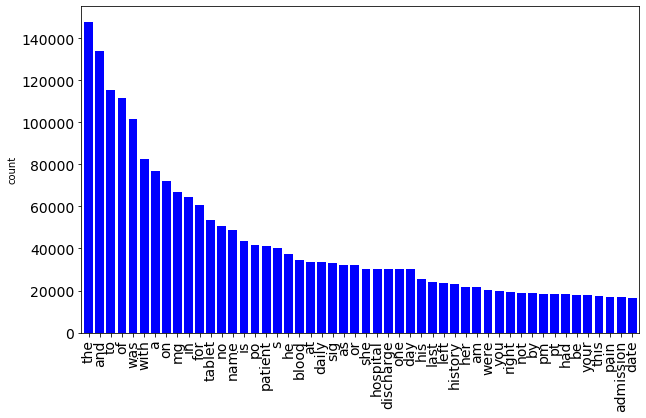

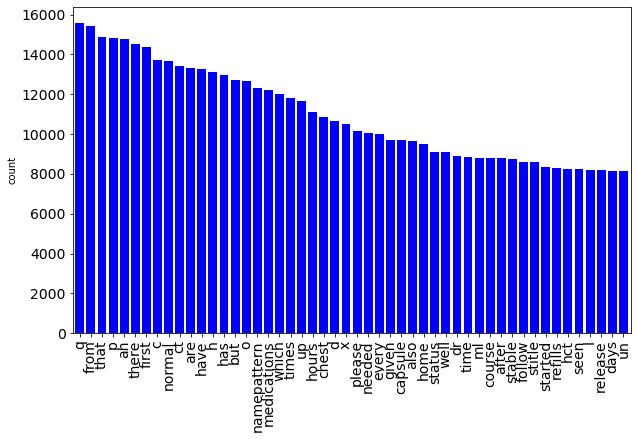

In [44]:
#Create a series from the sparse matrix
d = pd.Series(term_freq_df.total, 
              index = term_freq_df.index).sort_values(ascending=False)
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()

In [20]:
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

In [21]:
%time
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 5000, 
                       tokenizer = tokenizer_better, 
                       stop_words = my_stop_words)
# this could take a while
vect.fit(df_train.TEXT.values)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 16.9 µs


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_better at 0x7fc091ca0e18>,
                vocabulary=None)

Transform notes into the vector format

In [22]:
X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)

Get labels


In [23]:
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

# Build a simple predictive model

Use random forest

In [24]:
# logistic regression
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(X_train_tf, y_train)

/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Calculate probability of re-admission

In [25]:
model = clf
y_train_preds = model.predict_proba(X_train_tf)[:,1]
y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

In [26]:
print(y_train[:10].values)
print(y_train_preds[:10])

[1 1 0 1 1 1 0 0 1 1]
[0.6 0.9 0.  1.  0.7 0.7 0.1 0.  0.9 0.9]


# Performance Metrics

In [27]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)


Train prevalence:0.500
Valid prevalence:0.057
Train AUC:0.997
Valid AUC:0.639
Train accuracy:0.977
Valid accuracy:0.523
Train recall:0.975
Valid recall:0.696
Train precision:0.979
Valid precision:0.079
Train specificity:0.979
Valid specificity:0.512


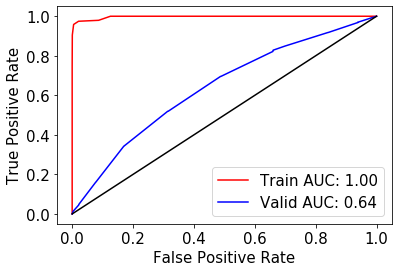

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%accuracy_score(y_train, y_train_preds >= thresh))
print('Valid accuracy:%.3f'%accuracy_score(y_valid, y_valid_preds >= thresh))

print('Train recall:%.3f'%recall_score(y_train, y_train_preds>= thresh))
print('Valid recall:%.3f'%recall_score(y_valid, y_valid_preds>= thresh))

print('Train precision:%.3f'%precision_score(y_train, y_train_preds>= thresh))
print('Valid precision:%.3f'%precision_score(y_valid, y_valid_preds>= thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# Try to improve the model

In [29]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

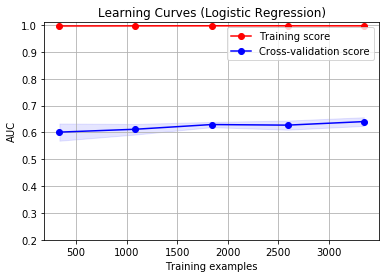

In [30]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(n_jobs=-1)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.show()

# Feature Importance

Let's look at the most important tokens for each class. 

In [33]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = vect.get_feature_names(),
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

For random forest classifier, the variables with highest positive coefficients are predictive of re-hospitalization.

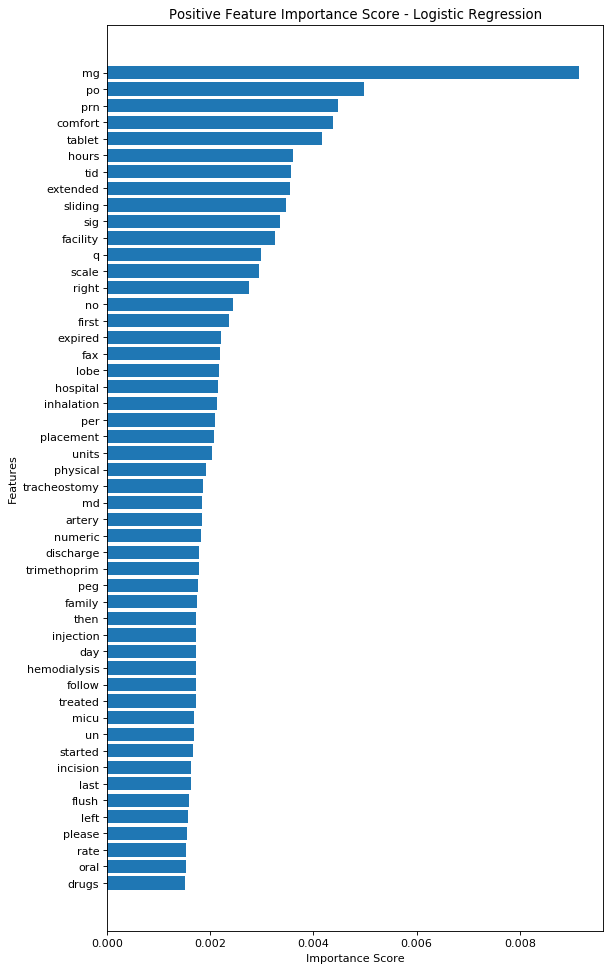

In [34]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Random forest classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

### update stop words 

In [46]:
my_new_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','should','if','it','been','who','during', 'x']

In [47]:
vect = CountVectorizer(lowercase = True, max_features = 3000, tokenizer = tokenizer_better,stop_words =my_new_stop_words)
#
# This could take a while
vect.fit(df_train.TEXT.values)

X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

## Hyperparameter Tuning


https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d


### number of estimators

In [50]:
n_est =  [10, 100, 500, 1000, 2000]
train_aucs = np.zeros(len(n_est))
valid_aucs = np.zeros(len(n_est))

for ii in range(len(n_est)):
    n = n_est[ii]
    print('\n nestimator:', n)
    
    # Random forest regression
    
    #clf=LogisticRegression(C = C, penalty = 'l2', random_state = 42)
    clf = RandomForestClassifier(n_estimators=n, n_jobs=-1, random_state=42)
    clf.fit(X_train_tf, y_train)

    model = clf
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    print('Train AUC:%.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid


 nestimator: 10
Train AUC:0.997
Valid AUC:0.665

 nestimator: 100
Train AUC:1.000
Valid AUC:0.716

 nestimator: 500
Train AUC:1.000
Valid AUC:0.719

 nestimator: 1000
Train AUC:1.000
Valid AUC:0.723

 nestimator: 2000
Train AUC:1.000
Valid AUC:0.724


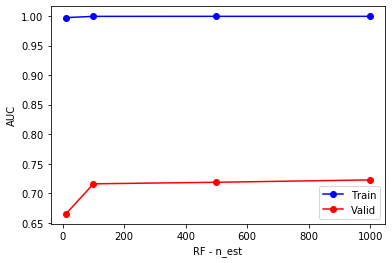

In [49]:
plt.plot(n_est, train_aucs,'bo-', label ='Train')
plt.plot(n_est, valid_aucs, 'ro-', label='Valid')
plt.legend()
plt.xlabel('RF - n_est')
plt.ylabel('AUC')
plt.show()

### max depth

In [55]:
max_d =  [2,4,6,10,100]
train_aucs = np.zeros(len(max_d))
valid_aucs = np.zeros(len(max_d))

for ii in range(len(max_d)):
    n = max_d[ii]
    print('\n max_d:', n)
    
    # Random forest regression
    
   
    clf = RandomForestClassifier(max_depth=n, n_jobs=-1, random_state=42)
    clf.fit(X_train_tf, y_train)

    model = clf
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    print('Train AUC:%.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid


 max_d: 2


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.676
Valid AUC:0.668

 max_d: 4


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.718
Valid AUC:0.667

 max_d: 6


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.796
Valid AUC:0.678

 max_d: 10


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.922
Valid AUC:0.683

 max_d: 100


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.997
Valid AUC:0.665


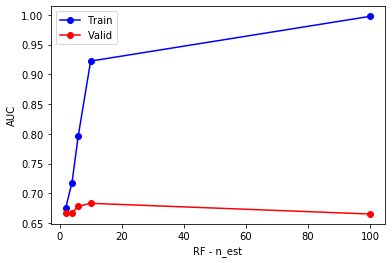

In [56]:
plt.plot(max_d, train_aucs,'bo-', label ='Train')
plt.plot(max_d, valid_aucs, 'ro-', label='Valid')
plt.legend()
plt.xlabel('RF - max_d')
plt.ylabel('AUC')
plt.show()

### min_samples_split

In [61]:
min_s =  [0.0001,0.001,0.01,0.1,0.5,0.99]
train_aucs = np.zeros(len(min_s))
valid_aucs = np.zeros(len(min_s))

for ii in range(len(min_s)):
    n = min_s[ii]
    print('\n minimum sample split:', n)
    
    # Random forest regression
    
   
    clf = RandomForestClassifier(min_samples_split=n, n_jobs=-1, random_state=42)
    clf.fit(X_train_tf, y_train)

    model = clf
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    print('Train AUC:%.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid


 minimum sample split: 0.0001


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.997
Valid AUC:0.665

 minimum sample split: 0.001


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.995
Valid AUC:0.638

 minimum sample split: 0.01


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.957
Valid AUC:0.673

 minimum sample split: 0.1


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.747
Valid AUC:0.687

 minimum sample split: 0.5


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.662
Valid AUC:0.654

 minimum sample split: 0.99


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC:0.500
Valid AUC:0.500


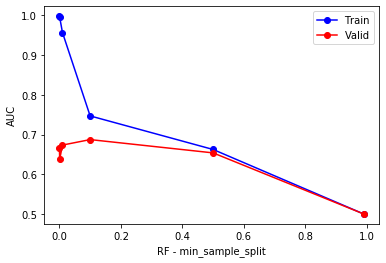

In [62]:
plt.plot(min_s, train_aucs,'bo-', label ='Train')
plt.plot(min_s, valid_aucs, 'ro-', label='Valid')
plt.legend()
plt.xlabel('RF - min_sample_split')
plt.ylabel('AUC')
plt.show()

### max_features

In [64]:

%%time

num_features = [100,3000]

train_aucs = np.zeros(len(num_features))
valid_aucs = np.zeros(len(num_features))

for ii in range(len(num_features)):
    num = num_features[ii]
    print('\nnumber of features:', num)
    vect = CountVectorizer(lowercase = True, max_features = num, 
                           tokenizer = tokenizer_better,stop_words =my_new_stop_words)

    # This could take a while
    vect.fit(df_train.TEXT.values)

    X_train_tf = vect.transform(df_train.TEXT.values)
    X_valid_tf = vect.transform(df_valid.TEXT.values)
    y_train = df_train.OUTPUT_LABEL
    y_valid = df_valid.OUTPUT_LABEL
    
       
    clf = RandomForestClassifier(n_jobs=-1, random_state=42)
    clf.fit(X_train_tf, y_train)

    model = clf
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    print('Train AUC: %.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid


number of features: 100


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC: 0.998
Valid AUC:0.619

number of features: 3000


/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train AUC: 0.997
Valid AUC:0.665
CPU times: user 3min 36s, sys: 229 ms, total: 3min 36s
Wall time: 3min 36s


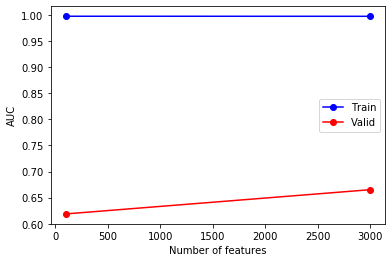

In [65]:
plt.plot(num_features, train_aucs,'bo-', label ='Train')
plt.plot(num_features, valid_aucs, 'ro-', label='Valid')
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

# Final model 

we avoid folks who are dead here, since our aim is to get the  re-admissions right. 

In [66]:
# shuffle the samples

rows_not_death = df.DEATHTIME.isnull()

df_not_death = df.loc[rows_not_death].copy()
df_not_death = df_not_death.sample(n = len(df_not_death), random_state = 42)
df_not_death = df_not_death.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df_not_death.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_not_death.drop(df_valid_test.index)

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))
print('all samples (n = %d)'%len(df))

# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

# preprocess the text to deal with known issues
df_train = preprocess_text(df_train)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)


Test prevalence(n = 6798): 0.06590173580464842
Valid prevalence(n = 6798): 0.06913798175934098
Train all prevalence(n = 31725): 0.0644602048857368
all samples (n = 51113)
Train prevalence (n = 4090): 0.5


In [67]:
my_new_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','should','if','it','been','who','during', 'x']

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(lowercase = True, max_features = 3000,tokenizer = tokenizer_better,stop_words = my_new_stop_words)

# This could take a while
vect.fit(df_train.TEXT.values)

X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)
X_test_tf = vect.transform(df_test.TEXT.values)

y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL
y_test = df_test.OUTPUT_LABEL

clff=RandomForestClassifier(n_estimators=1000,max_depth=100, min_samples_split=0.1, n_jobs=-1, random_state=42)
clf.fit(X_train_tf, y_train)

model =clf
y_train_preds = model.predict_proba(X_train_tf)[:,1]
y_valid_preds = model.predict_proba(X_valid_tf)[:,1]
y_test_preds = model.predict_proba(X_test_tf)[:,1]

Train prevalence:0.500
Valid prevalence:0.069
Test prevalence: 0.066
Train AUC:0.768
Valid AUC:0.694
Test AUC:0.685
Train accuracy:0.686
Valid accuracy:0.632
Test accuracy:0.639
Train recall:0.681
Valid recall:0.651
Test recall:0.616
Train precision:0.688
Valid precision:0.116
Test precision:0.108
Train specificity:0.691
Valid specificity:0.631
Test specificity:0.640


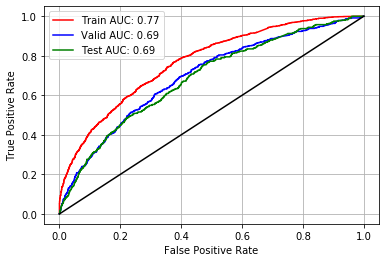

In [69]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)

thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))
print('Test prevalence: %.3f'%calc_prevalence(y_test))
print('=========================================')

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)
print('Test AUC:%.3f'%auc_test)
print('=========================================')


print('Train accuracy:%.3f'%accuracy_score(y_train, y_train_preds >= thresh))
print('Valid accuracy:%.3f'%accuracy_score(y_valid, y_valid_preds >= thresh))
print('Test accuracy:%.3f'%accuracy_score(y_test, y_test_preds>= thresh))
print('=========================================')

print('Train recall:%.3f'%recall_score(y_train, y_train_preds>= thresh))
print('Valid recall:%.3f'%recall_score(y_valid, y_valid_preds>= thresh))
print('Test recall:%.3f'%recall_score(y_test, y_test_preds>= thresh))
print('=========================================')

print('Train precision:%.3f'%precision_score(y_train, y_train_preds>= thresh))
print('Valid precision:%.3f'%precision_score(y_valid, y_valid_preds>= thresh))
print('Test precision:%.3f'%precision_score(y_test, y_test_preds>= thresh))
print('=========================================')

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))
print('Test specificity:%.3f'%calc_specificity(y_test, y_test_preds, thresh))
print('=========================================')

plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot(fpr_test, tpr_test,'g-',label = 'Test AUC: %.2f'%auc_test)

plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()